In [1]:
#include <string>
#include <fstream>
#include "xtl/xbase64.hpp"
#include "xwidgets/xslider.hpp"
#include "xtensor/xview.hpp"
#include "xtensor/xio.hpp"

In [2]:
#include "xtensor-io/ximage.hpp"
#include "xtensor-io/xaudio.hpp"
#include "xtensor-io/xnpz.hpp"

In [4]:
template <class E>
auto display(const xt::xexpression<E>& e, xeus::xguid id = xeus::xguid(), bool update = false)
{
    xt::dump_image("/tmp/xio_image.png", e);
    std::ifstream fin("/tmp/xio_image.png", std::ios::binary);
    std::stringstream buffer;
    buffer << fin.rdbuf();

    xeus::xjson mime;
    mime["image/png"] = xtl::base64encode(buffer.str());
    xeus::xjson transient;

    if (update)
    {
        transient["display_id"] = id;
        xeus::get_interpreter().update_display_data(
            std::move(mime),
            xeus::xjson::object(),
            std::move(transient));
        return id;
    }
    else
    {
        id = xeus::new_xguid();
        transient["display_id"] = id;
        xeus::get_interpreter().display_data(
            std::move(mime),
            xeus::xjson::object(),
            std::move(transient));
        return id;
    }
}

In [5]:
auto lightsaber = xt::load_image("images/saber.png");

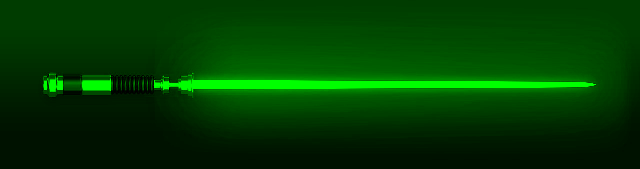

In [6]:
auto display_id = display(lightsaber);

In [7]:
template <class E>
void modify_image(xt::xexpression<E>& e, double value)
{
    xt::xarray<double> lightsaber_modified = e.derived_cast();
    double inc = value / 5.;
    xt::xarray<double> filter = {1. - inc, 1. + inc, 1. - inc};
    lightsaber_modified *= filter;
    xt::xarray<uint8_t> lightsaber_display = xt::cast<uint8_t>(xt::clip(lightsaber_modified, 0, 255));
    display(lightsaber_display, display_id, true);
}

In [8]:
xw::slider<double> slider;
slider.max = 5;
slider.continuous_update = false;
slider.display()

A Jupyter widget

In [9]:
XOBSERVE(slider, value, [](const auto& s) {
    modify_image(lightsaber, s.value());
});